In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import missingno as msno


In [2]:
filename = "20200404_LWB_Client_Events_Month.csv"


In [3]:
fullData = pd.read_csv(filename)
#data = pd.read_csv(filename, nrows=1000)

/Users/miaoqinli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (849,856,934,935,936,938,939,940,941,942,943,944,945,947,948,949,951,952,953,975,976,978,1008,1014,1029) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
column_of_allrows = fullData.filter(regex=r'^allrows', axis=1)
column_of_allrows.columns
column_of_allrows.shape


Index(['allrows_client_row_natural_id', 'allrows_client_cirtsid_anon_hash',
       'allrows_client_regionid_anon_hash',
       'allrows_client_countryid_anon_hash', 'allrows_client_didexistprecirts',
       'allrows_client_isactive', 'allrows_client_statusreason',
       'allrows_client_createdbyid', 'allrows_client_keyworker_anon_hash',
       'allrows_client_clientinactivestatusreasonid',
       ...
       'allrows_keyworker_seifa_percentile_min_alltime',
       'allrows_client_age_at_event', 'allrows_client_maoridescent_string',
       'allrows_join_clientpostcode_seifa_score',
       'allrows_join_clientpostcode_seifa_ausrank',
       'allrows_join_clientpostcode_seifa_decile',
       'allrows_join_clientpostcode_seifa_percentile',
       'allrows_client_days_since_first_contact', 'allrows_client_current_age',
       'allrows_client_current_age_group'],
      dtype='object', length=231)

(124293, 231)

Index(['allrows_client_row_natural_id', 'allrows_client_cirtsid_anon_hash',
       'allrows_client_regionid_anon_hash',
       'allrows_client_countryid_anon_hash', 'allrows_client_didexistprecirts',
       'allrows_client_isactive', 'allrows_client_statusreason',
       'allrows_client_createdbyid', 'allrows_client_keyworker_anon_hash',
       'allrows_client_clientinactivestatusreasonid',
       ...
       'allrows_keyworker_seifa_percentile_min_alltime',
       'allrows_client_age_at_event', 'allrows_client_maoridescent_string',
       'allrows_join_clientpostcode_seifa_score',
       'allrows_join_clientpostcode_seifa_ausrank',
       'allrows_join_clientpostcode_seifa_decile',
       'allrows_join_clientpostcode_seifa_percentile',
       'allrows_client_days_since_first_contact', 'allrows_client_current_age',
       'allrows_client_current_age_group'],
      dtype='object', length=231)

(124293, 231)

                                                                                   column_name  \
allrows_client_row_natural_id                                    allrows_client_row_natural_id   
allrows_client_cirtsid_anon_hash                              allrows_client_cirtsid_anon_hash   
allrows_client_regionid_anon_hash                            allrows_client_regionid_anon_hash   
allrows_client_countryid_anon_hash                          allrows_client_countryid_anon_hash   
allrows_client_didexistprecirts                                allrows_client_didexistprecirts   
allrows_client_isactive                                                allrows_client_isactive   
allrows_client_statusreason                                        allrows_client_statusreason   
allrows_client_createdbyid                                          allrows_client_createdbyid   
allrows_client_keyworker_anon_hash                          allrows_client_keyworker_anon_hash   
allrows_client_clien

(231, 2)

([<matplotlib.axis.XTick at 0x1a20c91190>],
 <a list of 1 Text xticklabel objects>)

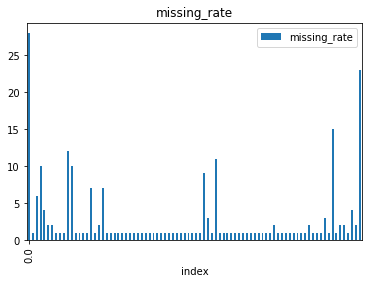

In [6]:
column_of_allrows = fullData.filter(regex=r'^allrows', axis=1)
column_of_allrows.columns
column_of_allrows.shape

#check the missing_rate
columns = column_of_allrows.columns
percent_missing = column_of_allrows.isnull().sum()*100/len(column_of_allrows)
missing_value_numeric_column = pd.DataFrame({'column_name':columns,'missing_rate':percent_missing})
print(missing_value_numeric_column.head(20))
missing_value_numeric_column.shape


missing_counts=missing_value_numeric_column['missing_rate'].value_counts()
df_missing_counts = pd.DataFrame(missing_counts)
df = df_missing_counts.reset_index()
df=df.sort_values(by=['index'])


df.plot.bar(y = 'missing_rate',x='index',title='missing_rate')

x = range(0,1)
plt.xticks(x)


In [7]:
column_of_allrows.dtypes

allrows_client_row_natural_id                    object
allrows_client_cirtsid_anon_hash                 object
allrows_client_regionid_anon_hash                object
allrows_client_countryid_anon_hash               object
allrows_client_didexistprecirts                   int64
                                                 ...   
allrows_join_clientpostcode_seifa_decile        float64
allrows_join_clientpostcode_seifa_percentile    float64
allrows_client_days_since_first_contact         float64
allrows_client_current_age                        int64
allrows_client_current_age_group                 object
Length: 231, dtype: object

In [8]:
cols = column_of_allrows.columns
count_object = 0
for col in cols:
    if str(column_of_allrows[col].dtype) == 'object':
        count_object +=1
        print(col)
count_object

allrows_client_row_natural_id
allrows_client_cirtsid_anon_hash
allrows_client_regionid_anon_hash
allrows_client_countryid_anon_hash
allrows_client_createdbyid
allrows_client_keyworker_anon_hash
allrows_client_clientinactivestatusreasonid
allrows_client_sectorid_min
allrows_client_sectormin_description_anon_hash
allrows_client_region_description_anon_hash
allrows_client_stateid
allrows_client_countryid_allrow_latest
allrows_client_state_anon_hash
allrows_client_row_natural_id_dup
allrows_client_title_anon_hash
allrows_client_countryofbirthid
allrows_client_placeofbirth_anon_hash
allrows_client_atsiid
allrows_client_clanid
allrows_client_ethnicityid
allrows_client_primarylanguageid
allrows_client_secondarylanguageid
allrows_client_religionid
allrows_keyworker_min_alltime_award
allrows_keyworker_min_alltime_position_name_anon_hash
allrows_keyworker_min_alltime_position_key
allrows_keyworker_min_alltime_cost_centre_key
allrows_keyworker_min_alltime_cost_centre_name_anon_hash
allrows_keywor

90

In [9]:
column_of_allrows['allrows_client_row_natural_id'].head(2)
column_of_allrows['allrows_client_cirtsid_anon_hash'].head(2)


0    0000D172-EA88-432F-8235-9FAA00D29072
1    0000D172-EA88-432F-8235-9FAA00D29072
Name: allrows_client_row_natural_id, dtype: object

0    e4da3b7fbbce2345d7772b0674a318d5
1    e4da3b7fbbce2345d7772b0674a318d5
Name: allrows_client_cirtsid_anon_hash, dtype: object

In [10]:
#drop non_numeric column，they are information of id,hash data,detail data and description data
numeric_column = column_of_allrows.drop(['allrows_diagnosis_primary_highest_severity_diagnosis_diagnosistypeid',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_diagnosiscategoryid',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_category_id',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_type_id',
                                         'allrows_datejoin_clientaddresschange_livingarrangementid',
                                         'allrows_datejoin_clientaddresschange_addresstypeid',
                                         'allrows_datejoin_clientaddresschange_state',
                                         'allrows_datejoin_clientaddresschange_livingarrangement_description',
                                         'allrows_datejoin_clientaddresschange_residentialsetting_description',
                                         'allrows_datejoin_client_best_address_addresstypeid',
                                         'allrows_datejoin_client_best_address_countryid',
                                         'allrows_datejoin_client_best_address_state',
                                         'allrows_client_row_natural_id','allrows_client_cirtsid_anon_hash',
                                         'allrows_client_regionid_anon_hash','allrows_client_countryid_anon_hash',
                                         'allrows_client_createdbyid','allrows_client_keyworker_anon_hash',
                                         'allrows_client_clientinactivestatusreasonid','allrows_client_sectorid_min',
                                         'allrows_client_sectormin_description_anon_hash','allrows_client_region_description_anon_hash',
                                         'allrows_client_stateid','allrows_client_countryid_allrow_latest',
                                         'allrows_client_state_anon_hash','allrows_client_row_natural_id_dup',
                                         'allrows_client_title_anon_hash','allrows_client_countryofbirthid',
                                         'allrows_client_placeofbirth_anon_hash','allrows_client_atsiid',
                                         'allrows_client_clanid','allrows_client_iwiid','allrows_client_iwiotherdetail',
                                         'allrows_client_ethnicityid','allrows_client_primarylanguageid',
                                         'allrows_client_secondarylanguageid','allrows_client_religionid',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_id',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_treatmentsummary',
                                         'allrows_event_type_detailed',
                                         'allrows_datejoin_clientaddresschange_livingarrangementotherdetail_anon_hash',
                                         'allrows_datejoin_clientaddresschange_residentialsettingid',
                                         'allrows_datejoin_clientaddresschange_residentialsettingotherdetail_anon_hash',
                                         'allrows_datejoin_clientaddresschange_address_description_anon_hash',
                                         'allrows_datejoin_clientaddresschange_suburb_anon_hash',
                                         'allrows_datejoin_clientaddresschange_postcode_anon_hash',
                                         'allrows_datejoin_clientaddresschange_countryid',
                                         'allrows_datejoin_placement_id','allrows_datejoin_placement_programid',
                                         'allrows_datejoin_placement_fundingcontractid','allrows_datejoin_placement_placementreasonid',
                                         'allrows_datejoin_placement_start_reasondesc_anon_hash','allrows_datejoin_servicetype_program_id',
                                         'allrows_datejoin_servicetype_program_servicetypeid','allrows_datejoin_servicetype_program_regionid',
                                         'allrows_datejoin_servicetype_program_reasonforentering_anon_hash',
                                         'allrows_datejoin_client_best_address_postcode_anon_hash',
                                         'allrows_datejoin_client_best_address_suburb_anon_hash'],axis=1)


In [11]:
# #delete all_nan column
numeric_column = numeric_column.dropna(axis=1,how='all')
#del rate_of_missing_value>99%(124293*0.99)
value_of_99perc = 124293*0.99
numeric_column = numeric_column.dropna(thresh=124293-value_of_99perc,axis=1)

                                                                                          column_name  \
allrows_client_didexistprecirts                                       allrows_client_didexistprecirts   
allrows_client_isactive                                                       allrows_client_isactive   
allrows_client_statusreason                                               allrows_client_statusreason   
allrows_client_gender                                                           allrows_client_gender   
allrows_client_dobestimated                                               allrows_client_dobestimated   
allrows_client_maoridescent                                               allrows_client_maoridescent   
allrows_client_cald                                                               allrows_client_cald   
allrows_client_interpreterrequired                                 allrows_client_interpreterrequired   
allrows_client_has_disability_diagnosis_bool           

(92, 2)

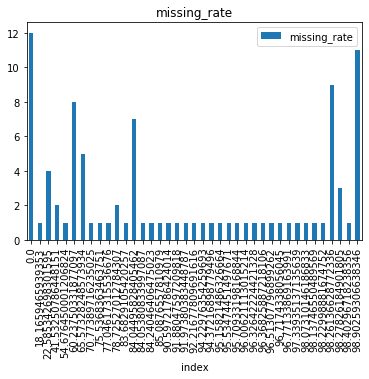

In [12]:
#check the remainning_missing_rate
columns = numeric_column.columns
percent_missing = numeric_column.isnull().sum()*100/len(numeric_column)
missing_value_numeric_column = pd.DataFrame({'column_name':columns,'missing_rate':percent_missing})
print(missing_value_numeric_column.head(20))
missing_value_numeric_column.shape


missing_counts=missing_value_numeric_column['missing_rate'].value_counts()
df_missing_counts = pd.DataFrame(missing_counts)
df = df_missing_counts.reset_index()
df=df.sort_values(by=['index'])

df.plot.bar(y = 'missing_rate',x='index',title='missing_rate')




In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Text(0.5, 0, 'allrows_client_statusreason')

Text(0, 0.5, 'category')

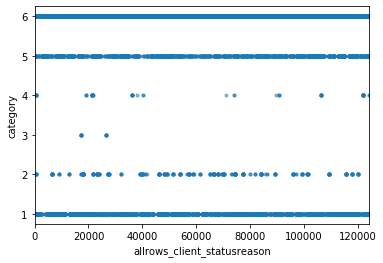

In [14]:
# deal with some "category", visualisation
numeric_column['allrows_client_statusreason'].plot(marker='.', alpha=0.5, linestyle='None')
plt.xlabel("allrows_client_statusreason")
plt.ylabel("category")


Text(0.5, 0, 'allrows_client_has_disability_diagnosis_bool')

Text(0, 0.5, 'category')

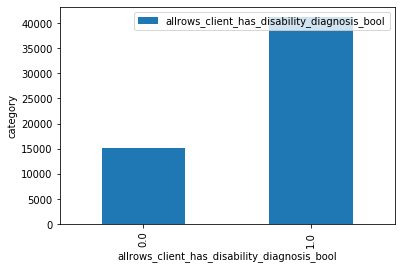

In [15]:
disability_counts=numeric_column['allrows_client_has_disability_diagnosis_bool'].value_counts()
df_disability_counts = pd.DataFrame(disability_counts)
df = df_disability_counts.reset_index()
df=df.sort_values(by=['index'])
df.plot.bar(x='index',y = 'allrows_client_has_disability_diagnosis_bool')
plt.xlabel("allrows_client_has_disability_diagnosis_bool")
plt.ylabel("category")

In [16]:
#set nan = -1 or 0,
numeric_column['allrows_client_statusreason'].fillna(0,inplace=True)
numeric_column['allrows_client_has_disability_diagnosis_bool'].fillna(-1,inplace=True)

Text(0.5, 0, 'allrows_client_has_disability_diagnosis_bool')

Text(0, 0.5, 'category')

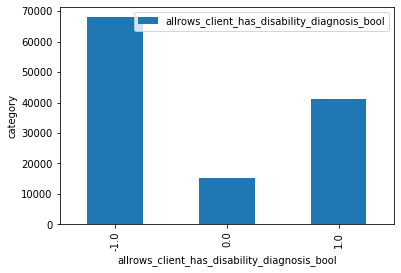

In [17]:
disability_counts=numeric_column['allrows_client_has_disability_diagnosis_bool'].value_counts()
df_disability_counts = pd.DataFrame(disability_counts)
df = df_disability_counts.reset_index()
df=df.sort_values(by=['index'])
df.plot.bar(x='index',y = 'allrows_client_has_disability_diagnosis_bool')
plt.xlabel("allrows_client_has_disability_diagnosis_bool")
plt.ylabel("category")

In [18]:
# deal with some "count"_column, set nan = 0
for i in numeric_column:
    numeric_column[i].fillna(0,inplace=True)

In [19]:
# #set category data into numeric data 1/0 true or false
numeric_column['allrows_event_type'].head(10)


0    progress_note_Case Discussion / Planning
1                            reference_active
2                     client_address_addition
3    progress_note_Case Discussion / Planning
4    progress_note_Case Discussion / Planning
5    progress_note_Case Discussion / Planning
6                            reference_active
7                            reference_active
8                            reference_active
9                            reference_active
Name: allrows_event_type, dtype: object

In [20]:
#spilt numeric_column['allrows_event_type'] into sub_category
new_allrows_event_type = pd.get_dummies(numeric_column['allrows_event_type'])
print(new_allrows_event_type)

        client_address_addition  client_alert_start  client_plan_end  \
0                             0                   0                0   
1                             0                   0                0   
2                             1                   0                0   
3                             0                   0                0   
4                             0                   0                0   
...                         ...                 ...              ...   
124288                        0                   0                0   
124289                        0                   0                0   
124290                        0                   0                0   
124291                        0                   0                0   
124292                        0                   0                0   

        client_plan_start  diagnosis_Complex Support Needs  \
0                       0                                0   
1          

In [21]:
# #set category data into numeric data 1/0 true or false
numeric_column['allrows_client_current_age_group'].head(10)


0    18 to 24
1    18 to 24
2    18 to 24
3    18 to 24
4    18 to 24
5    18 to 24
6    18 to 24
7    18 to 24
8    18 to 24
9    18 to 24
Name: allrows_client_current_age_group, dtype: object

In [22]:
new_allrows_client_current_age_group = pd.get_dummies(numeric_column['allrows_client_current_age_group'])
print(new_allrows_client_current_age_group)

        13 to 17  18 to 24  25 to 34  35 to 44  45 to 54  5 and under  \
0              0         1         0         0         0            0   
1              0         1         0         0         0            0   
2              0         1         0         0         0            0   
3              0         1         0         0         0            0   
4              0         1         0         0         0            0   
...          ...       ...       ...       ...       ...          ...   
124288         0         0         1         0         0            0   
124289         0         0         1         0         0            0   
124290         0         0         1         0         0            0   
124291         0         0         1         0         0            0   
124292         0         0         1         0         0            0   

        55 to 64  6 to 12  65 to 74  75 to 84  85 to 94  95 and over  
0              0        0         0         0       

In [23]:
numeric_column = numeric_column.drop(['allrows_event_type',
                                         'allrows_client_current_age_group'],axis=1)

In [24]:
allrows_done = pd.concat([numeric_column,new_allrows_event_type,new_allrows_client_current_age_group],axis=1)

In [25]:
allrows_done.shape

(124293, 161)

In [26]:
allrows_done.to_csv('allrows_data.csv')

In [27]:
read_csv = pd.read_csv('allrows_data.csv')
print(read_csv)
read_csv.head(10)

/Users/miaoqinli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (27,32,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        Unnamed: 0  allrows_client_didexistprecirts  allrows_client_isactive  \
0                0                                1                        1   
1                1                                1                        1   
2                2                                1                        1   
3                3                                1                        1   
4                4                                1                        1   
...            ...                              ...                      ...   
124288      124288                                0                        0   
124289      124289                                0                        0   
124290      124290                                0                        0   
124291      124291                                0                        0   
124292      124292                                0                        0   

        allrows_client_statusreason  al

,Unnamed: 0,allrows_client_didexistprecirts,allrows_client_isactive,allrows_client_statusreason,allrows_client_gender,allrows_client_dobestimated,allrows_client_maoridescent,allrows_client_cald,allrows_client_interpreterrequired,allrows_client_has_disability_diagnosis_bool,...,25 to 34,35 to 44,45 to 54,5 and under,55 to 64,6 to 12,65 to 74,75 to 84,85 to 94,95 and over
0,0,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
5,5,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
6,6,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
7,7,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
8,8,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
9,9,1,1,0.0,1,0,0,0,3,1.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
allrows_done.columns

Index(['allrows_client_didexistprecirts', 'allrows_client_isactive',
       'allrows_client_statusreason', 'allrows_client_gender',
       'allrows_client_dobestimated', 'allrows_client_maoridescent',
       'allrows_client_cald', 'allrows_client_interpreterrequired',
       'allrows_client_has_disability_diagnosis_bool',
       'allrows_client_incident_critical_total_count',
       ...
       '25 to 34', '35 to 44', '45 to 54', '5 and under', '55 to 64',
       '6 to 12', '65 to 74', '75 to 84', '85 to 94', '95 and over'],
      dtype='object', length=161)

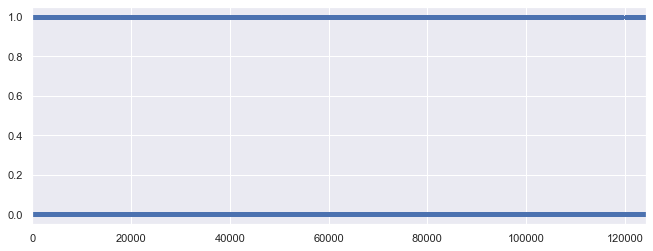

In [29]:
sns.set(rc={'figure.figsize':(11, 4)})
allrows_done['allrows_client_didexistprecirts'].plot(marker='.', alpha=0.5, linestyle='None')

In [30]:
join_of_allrows = allrows_done.filter(regex=r'^allrows_join', axis=1)


Text(0, 0.5, 'allrows_join')

Text(0, 0.5, 'allrows_join')

Text(0, 0.5, 'allrows_join')

Text(0, 0.5, 'allrows_join')

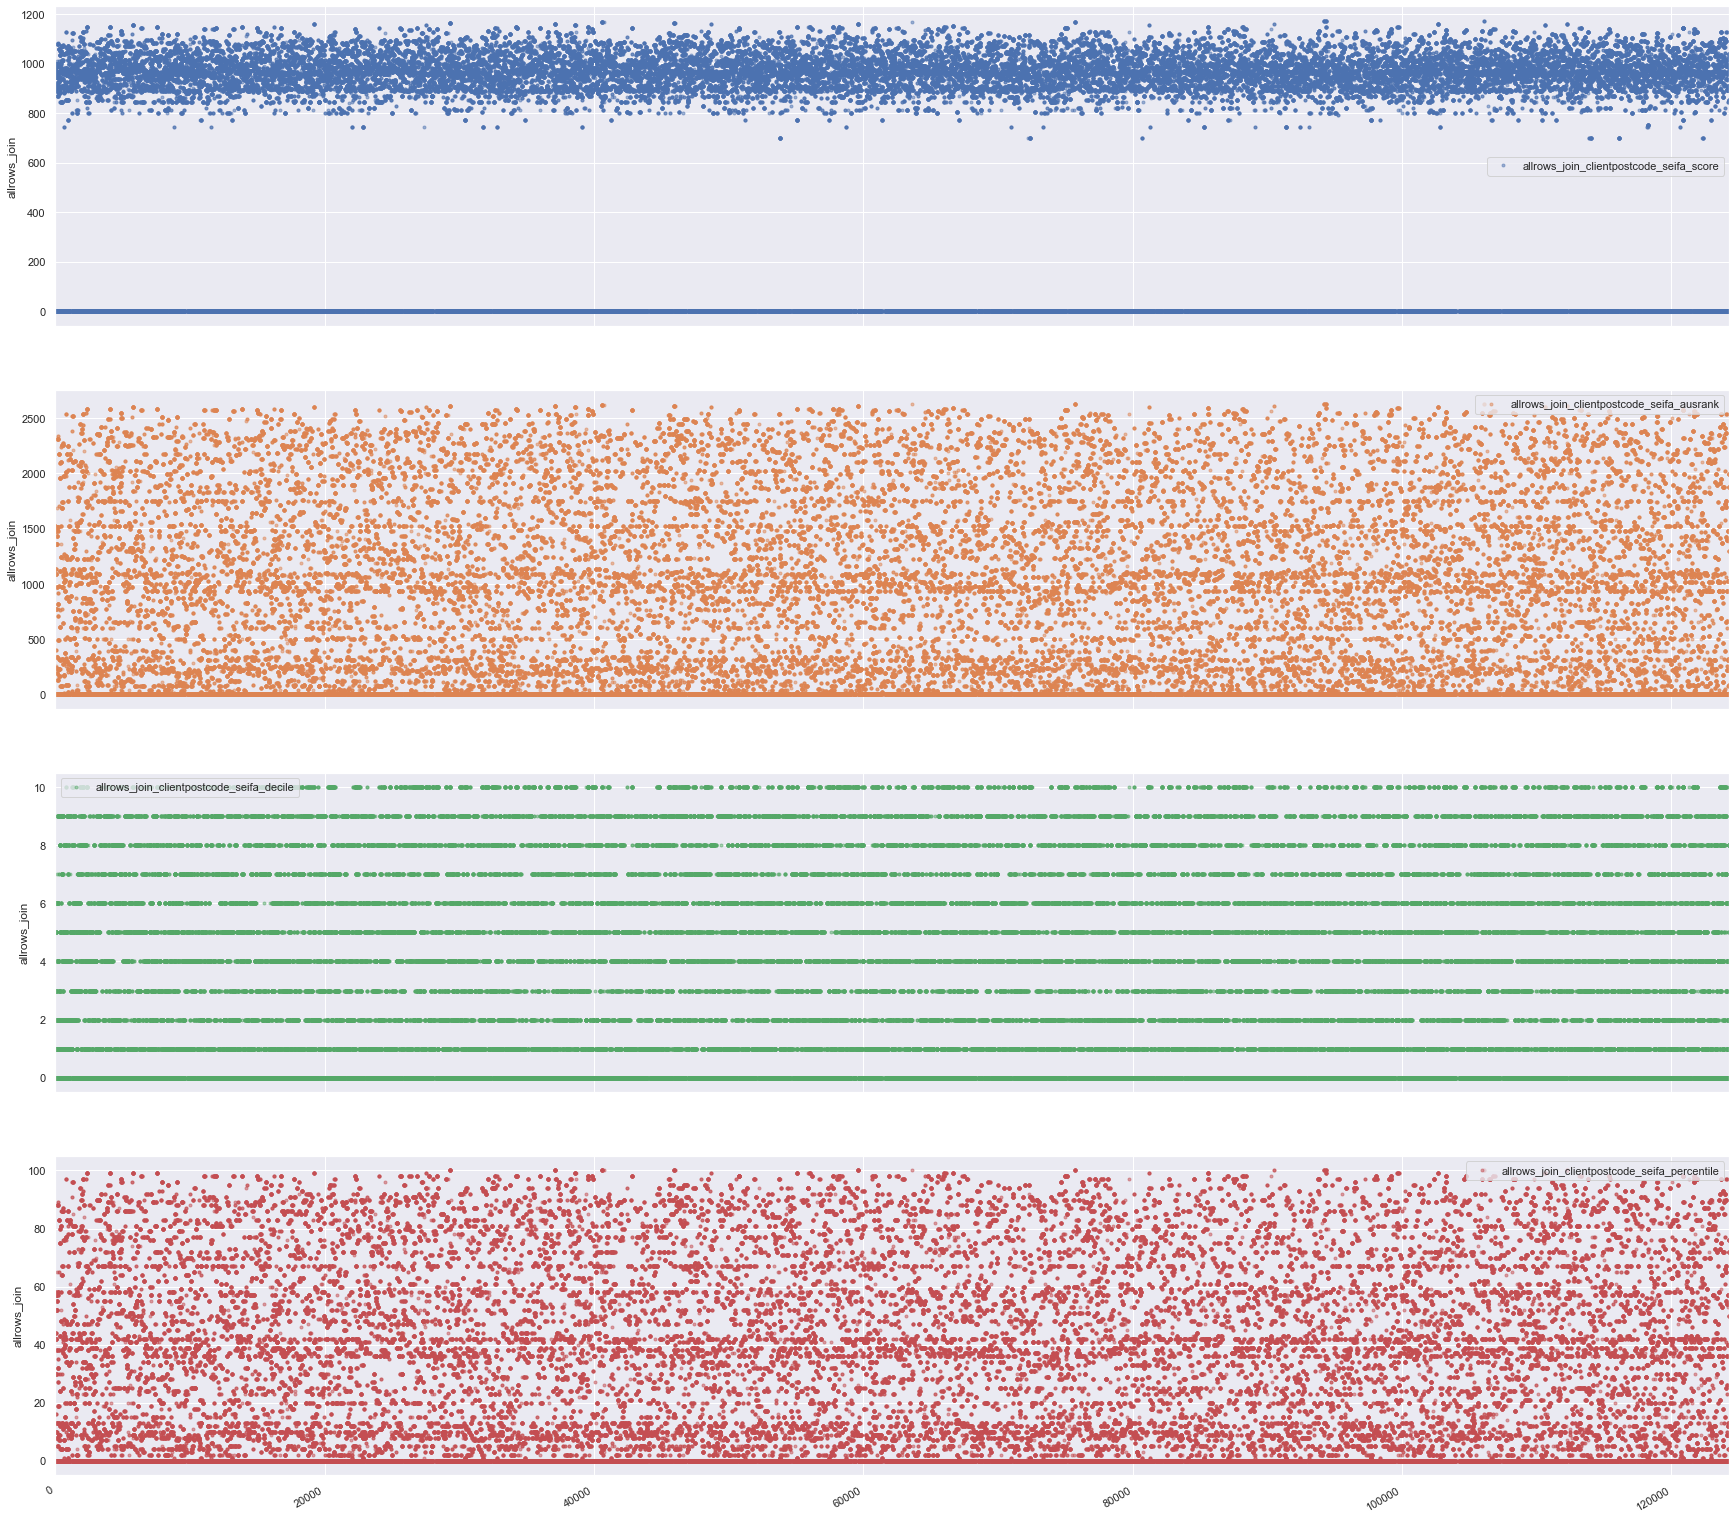

In [31]:
cols_plot = join_of_allrows.columns
axes = join_of_allrows.plot(marker='.', alpha=0.5, linestyle='None', figsize=(30, 30), subplots=True)
for ax in axes:
    ax.set_ylabel('allrows_join')
    

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

Text(0, 0.5, 'allrows_client')

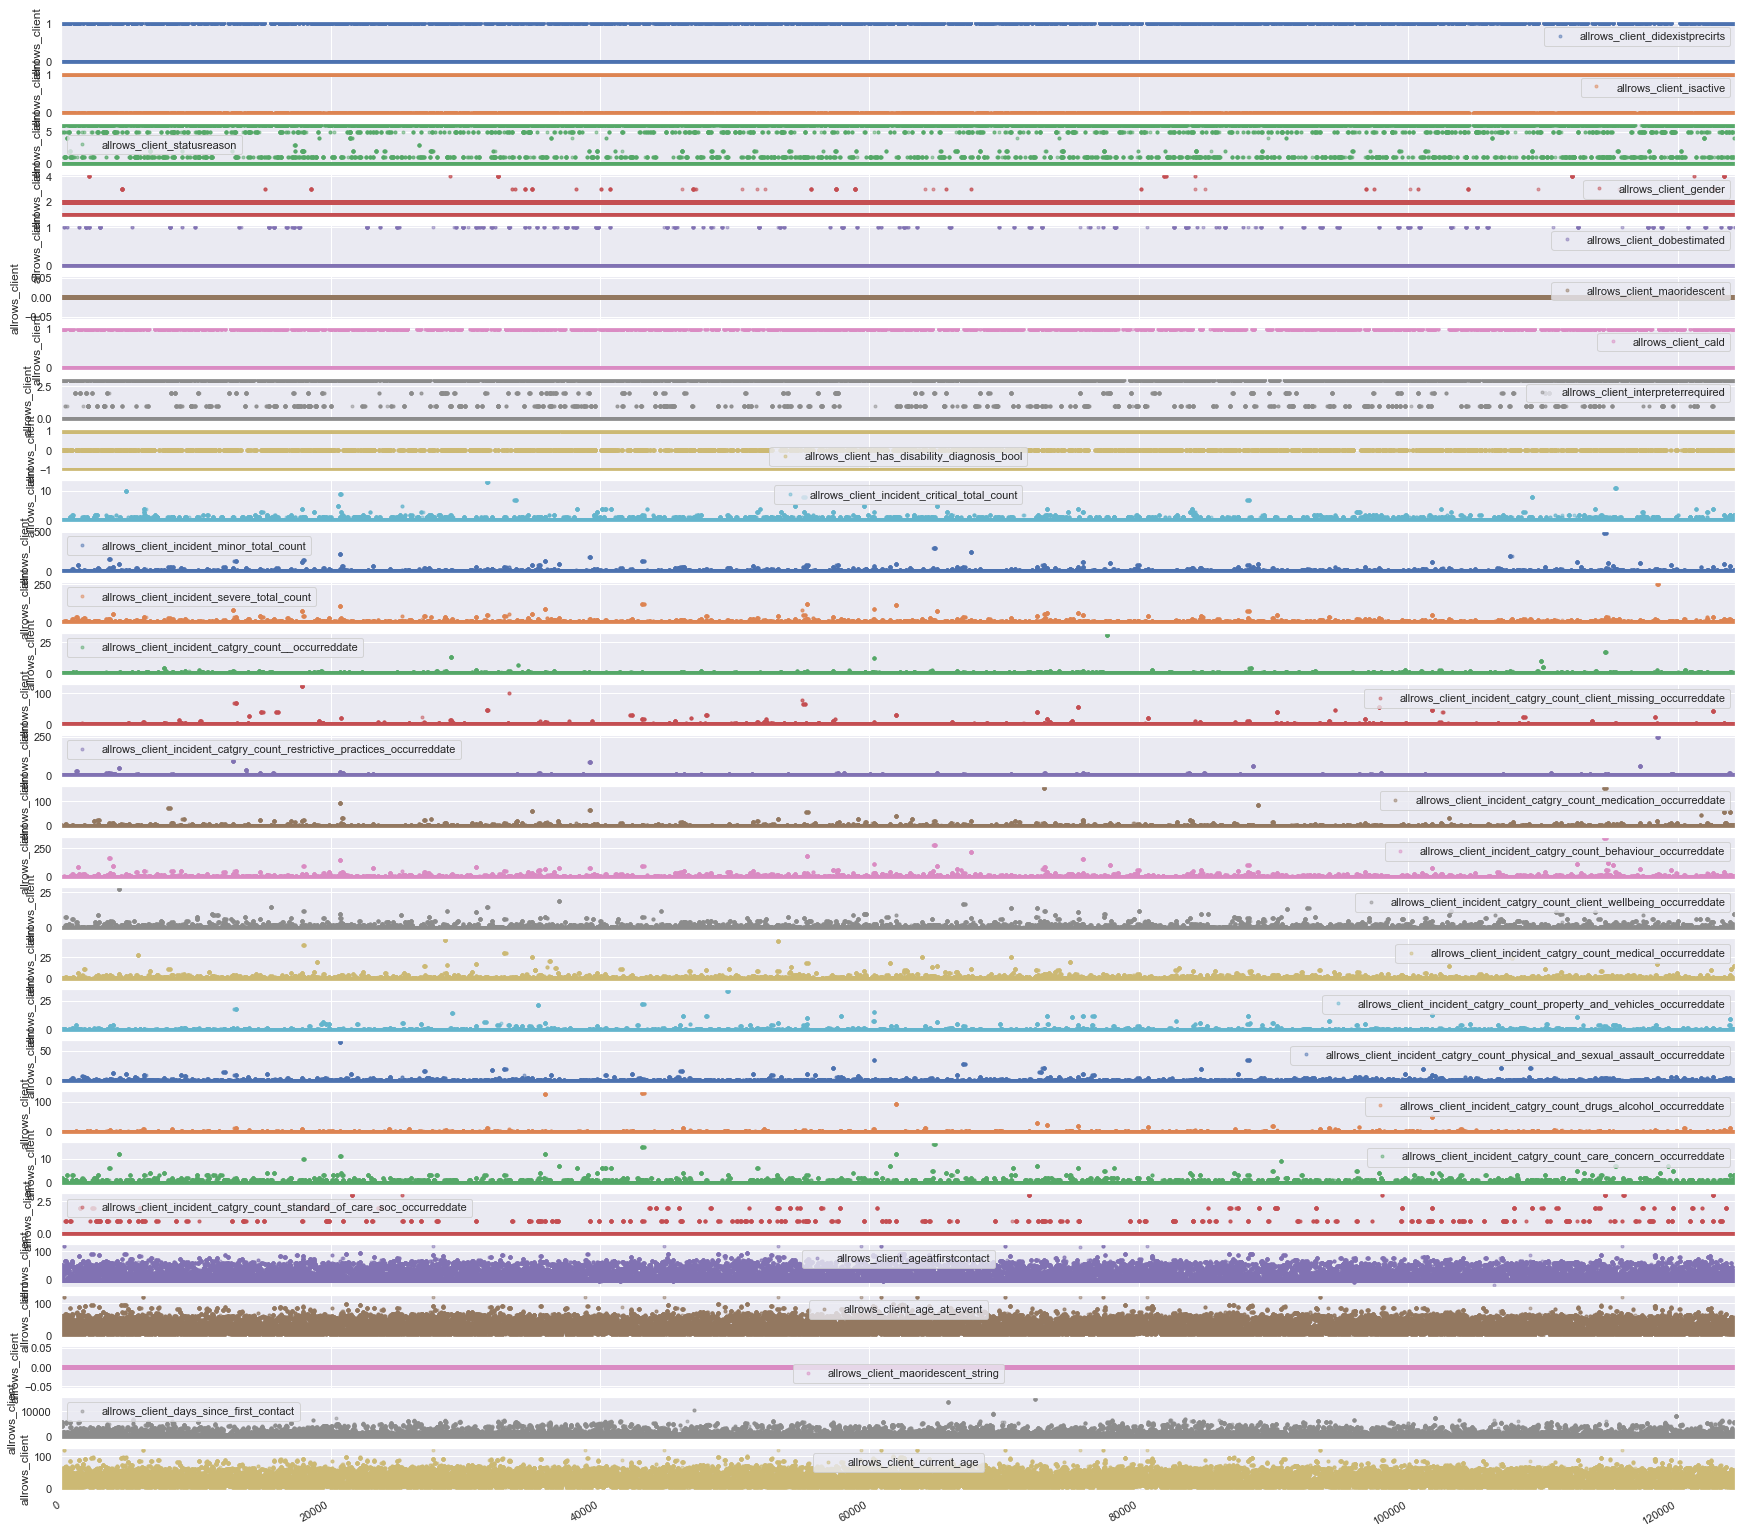

In [32]:
client_of_allrows = allrows_done.filter(regex=r'^allrows_client', axis=1)
cols_plot = client_of_allrows.columns
axes = client_of_allrows.plot(marker='.', alpha=0.5, linestyle='None', figsize=(30, 30), subplots=True)
for ax in axes:
    ax.set_ylabel('allrows_client')